## *Question's Answer*

---

### **1.1 Define signals and their importance in engineering applications.**

A **signal** is a function that conveys information about the behavior or attributes of some phenomenon. It typically represents a physical quantity that varies with time, space, or another independent variable. In engineering, signals are crucial because they allow systems to capture, process, analyze, and communicate data. Signals are foundational in various domains like electrical engineering, biomedical engineering, telecommunications, and control systems, where they represent data such as voltage, audio, temperature, or sensor readings.

---

### **1.2 Discuss the significance of signal visualization in analyzing and interpreting data.**

**Signal visualization** plays a critical role in understanding, analyzing, and interpreting complex data. By transforming numerical signals into visual forms such as plots or graphs, engineers can easily identify trends, patterns, anomalies, and key features that might be difficult to detect numerically. It enhances decision-making, supports debugging and validation of systems, and improves communication of technical findings. Visualization also helps compare different signals and assess the performance of signal processing techniques.

---

### **1.3 Explain the three dimensions of signal visualization: 1D, 2D, and 3D.**

- **1D Signal Visualization** involves plotting a signal against one independent variable, typically time. Common in ECG signals, audio waveforms, or temperature readings over time.

- **2D Signal Visualization** includes two spatial dimensions, like grayscale images or heatmaps, where intensity or value is represented in a 2D grid. It is widely used in image processing, medical imaging (like X-rays), and topographic data.

- **3D Signal Visualization** extends to three dimensions, often visualized as surfaces or volumes. Examples include 3D brain scans (fMRI), point clouds in LiDAR systems, or time-evolving 2D data. It enables more detailed spatial analysis and modeling of complex phenomena.

---

### **1.4 Explain the concepts of multi-channel and multi-modal signals.**

- **Multi-channel signals** refer to data captured simultaneously from multiple sources or sensors of the same modality. For example, an EEG (electroencephalogram) records electrical activity from different areas of the brain using multiple electrodes.

- **Multi-modal signals** involve combining information from different types of sensors or data sources. For instance, a wearable health monitor may collect both heart rate (electrical signal) and skin temperature (thermal signal). Multi-modal data enhances the depth and accuracy of analysis by integrating complementary information.

---

### **1.5 Explain the concept and uses of frequency-domain visualizations such as power spectrum density (PSD) and spectrogram.**

**Frequency-domain visualizations** provide insights into how a signal’s energy is distributed over frequency rather than time. They are essential when analyzing periodicity, noise, or filtering behavior.

- The **Power Spectrum Density (PSD)** shows how the power of a signal is distributed across different frequency components. It's useful in identifying dominant frequencies and understanding the energy concentration in signals.

- A **spectrogram** displays both time and frequency information, showing how the frequency content of a signal evolves over time. It is especially useful for non-stationary signals like speech, music, or animal sounds. Spectrograms help in applications like voice recognition, biomedical diagnostics, and machinery fault detection.

---


### **1.6 Explain the concepts and uses of dimensionality reduction, structure preservation, separability, and interpretability.**

- **Dimensionality Reduction** is the process of reducing the number of features or variables in a dataset while retaining as much relevant information as possible. It is used to simplify data, reduce noise, speed up computation, and visualize high-dimensional data in 2D or 3D.

- **Structure Preservation** means maintaining the original relationships or patterns between data points after dimensionality reduction. This is essential for keeping the intrinsic geometry of the dataset intact and ensuring that important features are not lost.

- **Separability** refers to the ability to distinguish between different classes or groups in the reduced-dimensional space. Good separability allows for more effective classification and clustering, especially in machine learning and pattern recognition tasks.

- **Interpretability** is the extent to which humans can understand the reduced data or features. Highly interpretable representations help explain model decisions and make the data insights more accessible, which is especially important in domains like healthcare, finance, or policy-making.

---

### **1.7 Define the concept of voxel and explain its use for video representation.**

A **voxel** (short for *volumetric pixel*) is a unit of graphic information that represents a value in a three-dimensional (3D) space, similar to how a pixel represents a 2D point in an image. In video and 3D data, voxels are used to capture spatial information over time, creating a 3D grid where each voxel contains data about color, intensity, or material at a particular point in space and time.

In **video representation**, voxels can be used to model motion and structure within a scene over time. For example, in action recognition or medical imaging, voxel-based models help analyze how objects or anatomical structures change in 3D space as the video progresses. This makes them useful in robotics, virtual reality, and medical diagnostics.

---

### **1.8 Explain briefly the use of markers as a motion representation approach.**

**Markers** are physical or digital points placed on specific parts of an object or a person to track movement. In motion capture systems (MoCap), reflective or colored markers are attached to joints or limbs, and their positions are recorded over time using cameras or sensors.

These markers allow for **precise motion representation**, capturing the trajectories and dynamics of movement in 2D or 3D space. They are widely used in animation, biomechanics, sports science, and medical rehabilitation to study human motion, improve athletic performance, or create realistic character animations in films and video games.

---

# **1D Assignement: Signal Processing**

In [56]:
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, welch, find_peaks
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [4]:
def load_ecg_data(filepath):
    data = arff.loadarff(filepath)
    df = pd.DataFrame(data[0])
    return df

## *1. Loading the dataset*

In [5]:
train_df = load_ecg_data('data/ECG5000_TRAIN.arff')
test_df = load_ecg_data('data/ECG5000_TEST.arff')
# Combine train and test data
ecg_df = pd.concat([train_df, test_df], axis=0)

In [6]:
# The last column is the target (class labels)
# Convert from bytes to string if needed
if isinstance(ecg_df.iloc[0, -1], bytes):
    ecg_df.iloc[:, -1] = ecg_df.iloc[:, -1].str.decode('utf-8')

print(f"Dataset shape: {ecg_df.shape}")
print(f"Class distribution:\n{ecg_df.iloc[:, -1].value_counts()}")

Dataset shape: (5000, 141)
Class distribution:
target
1    2919
2    1767
4     194
3      96
5      24
Name: count, dtype: int64


## *2. Time Domain Visualization*

In [7]:
def plot_ecg_time_domain(df, class_name, num_samples=5, normalize=True):
    # Filter by class
    class_data = df[df.iloc[:, -1] == class_name].iloc[:, :-1]

    plt.figure(figsize=(12, 6))

    # Plot multiple samples from this class
    for i in range(min(num_samples, len(class_data))):
        signal = class_data.iloc[i, :].values
        if normalize:
            signal = (signal - np.mean(signal)) / np.std(signal)
        plt.plot(signal, label=f'Sample {i+1}')

    plt.title(f'ECG Signals - Class {class_name}', fontsize=14)
    plt.xlabel('Time (samples)', fontsize=12)
    plt.ylabel('Amplitude (normalized)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

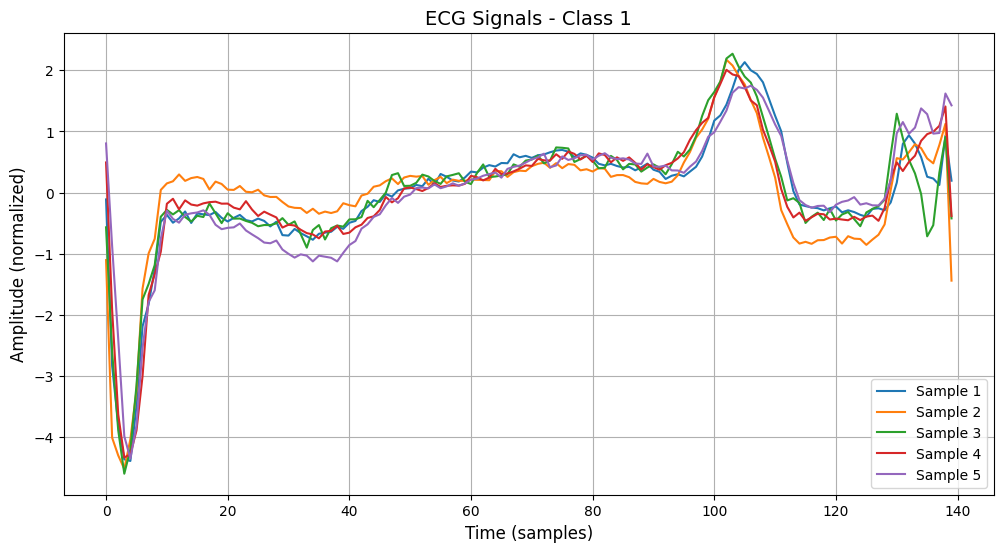

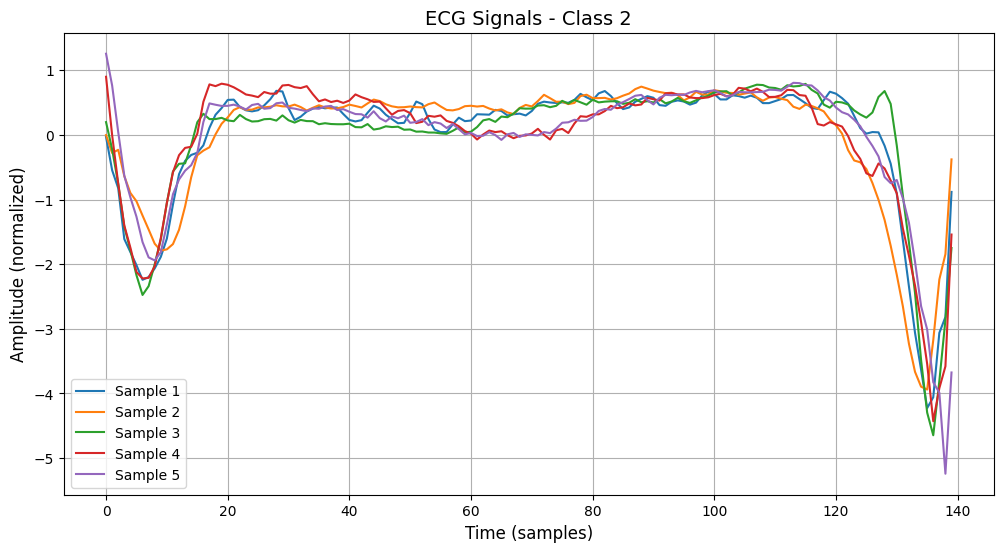

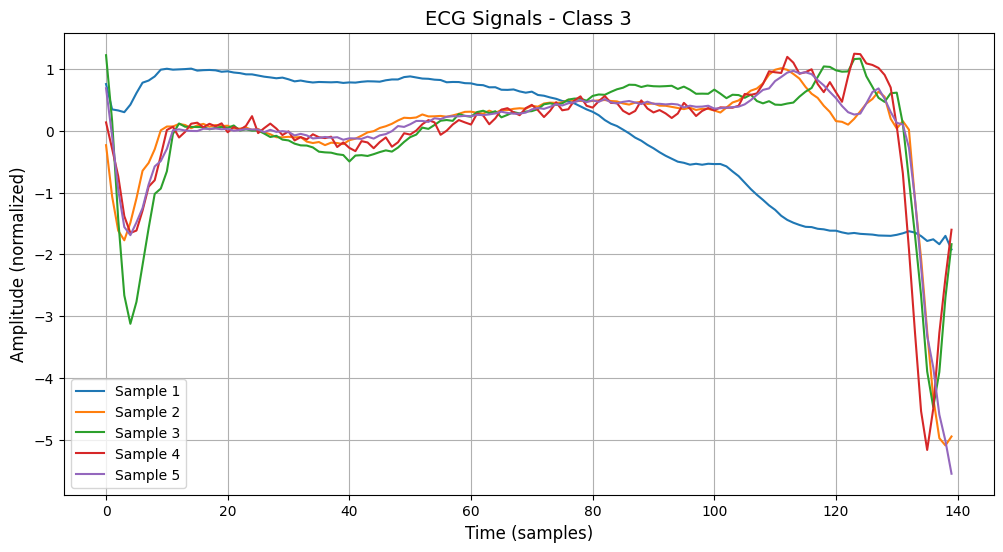

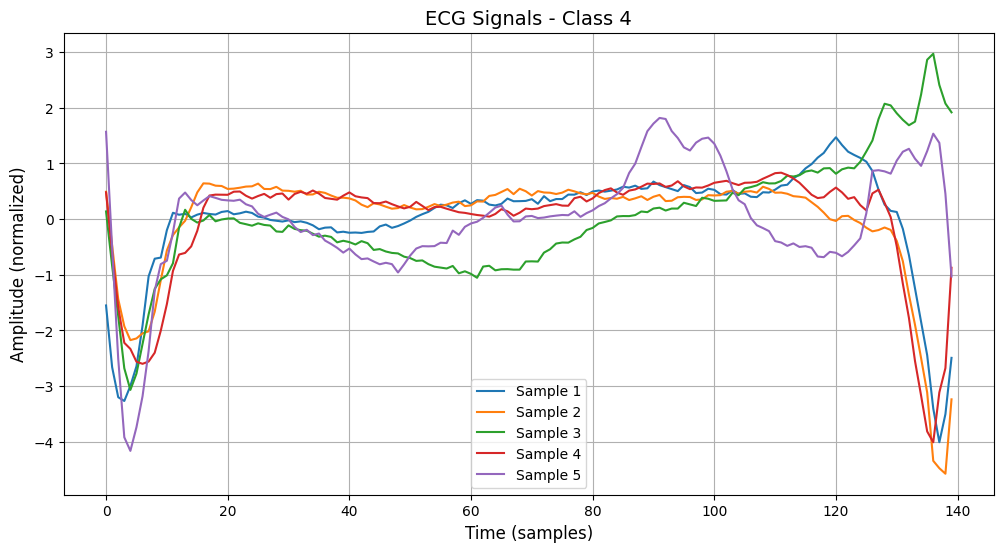

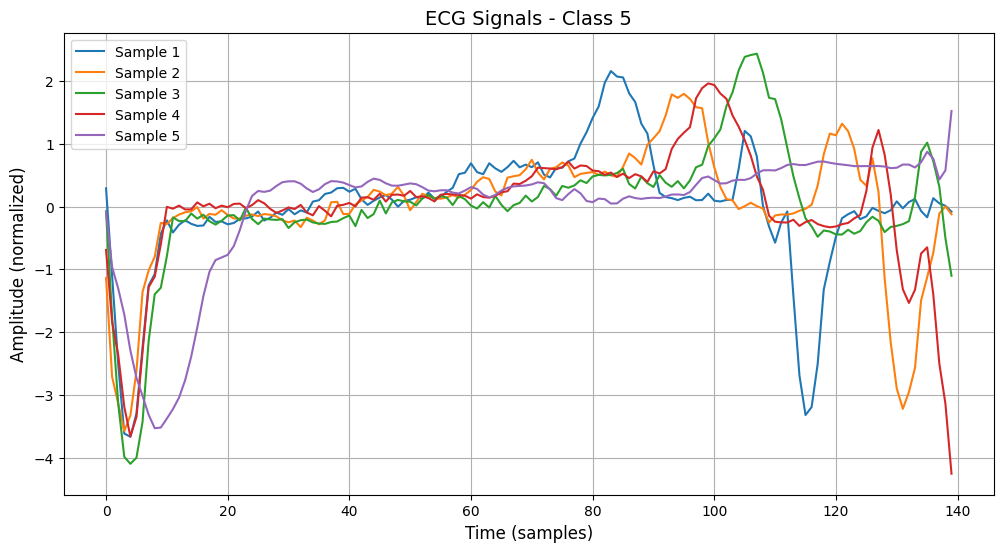

In [23]:

# Get unique classes
classes = ecg_df.iloc[:, -1].unique()

# Plot for each class
for cls in classes:
    plot_ecg_time_domain(ecg_df, cls)

- We can observe that the dataset contains uneven counts of signals in comparaison with each class , with approximately 3000 class 1 signals and only 24 signals from class 5.

- The signal from all the classes have the some similarity , by having at the start a downward peak that has an amplitude that ranges from -4 to -2 .

- Signals from class 1 are tightly clusters and all have approximately  the same shape that starts with the downward peak then has an upward peak at around 120 in time value,
then at the end another upward small peak at around 130 in time value.

- For class 2 we can see the signals are also tightly clustered and have a similar behavior with a downward peak at the beginning and another one at the end which has more amplitude than the first one twice as much. At the middle the signals seem to have a nearly constant behavior.

- Class 3 signals seeem to have a similar behavior to signals from class 2 , but they are not tightly clustered . Also there seems to be a signal that doesn't match the trend, starting at an amplitude  of 0.5 and somewhat following a decreasing variation.

- Class 4 seems to have the same behavior as class 2 , just that the two peaks have similar amplitudes around -3 to -4 , the signal are not tightly clustered , but are a little close to each other , but after 100 time value , they seem to have a random behavior that doesn't match  between them.

- Class 5 is caracterized by the first downward peak , after that all the signals seem to have an upward peak between 80 and 120 time values , that seems to be follower by random behavior that doesn't match between them. The signal are loosely clustered.

## *3. Concatenated Heartbeats Visualization*

### **Normalization Function**

In [59]:
def normalize_heartbeat(signal):
    """Normalize a single heartbeat to time [0,1] and amplitude [-1,1]"""
    # Time normalization (linear spacing)
    time_normalized = np.linspace(0, 1, len(signal))

    # Amplitude normalization
    scaler = MinMaxScaler(feature_range=(-1, 1))
    amp_normalized = scaler.fit_transform(signal.reshape(-1, 1)).flatten()

    return time_normalized, amp_normalized

### **Concatenated ECG Heartbeats by Class**

In [9]:
def plot_concatenated_heartbeats(df, samples_per_class=5):
    plt.figure(figsize=(15, 8))

    for i, cls in enumerate(classes):
        # Get samples for this class
        class_data = df[df.iloc[:, -1] == cls].iloc[:, :-1]

        # Select random samples
        samples = class_data.sample(
            min(samples_per_class, len(class_data)), random_state=42)

        # Concatenate and normalize
        concatenated = np.concatenate(samples.values)
        concatenated = (concatenated - np.mean(concatenated)) / \
            np.std(concatenated)

        # Plot
        plt.plot(concatenated, label=f'Class {cls}')

    plt.title('Concatenated ECG Heartbeats by Class', fontsize=16)
    plt.xlabel('Time (samples)', fontsize=14)
    plt.ylabel('Normalized Amplitude', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

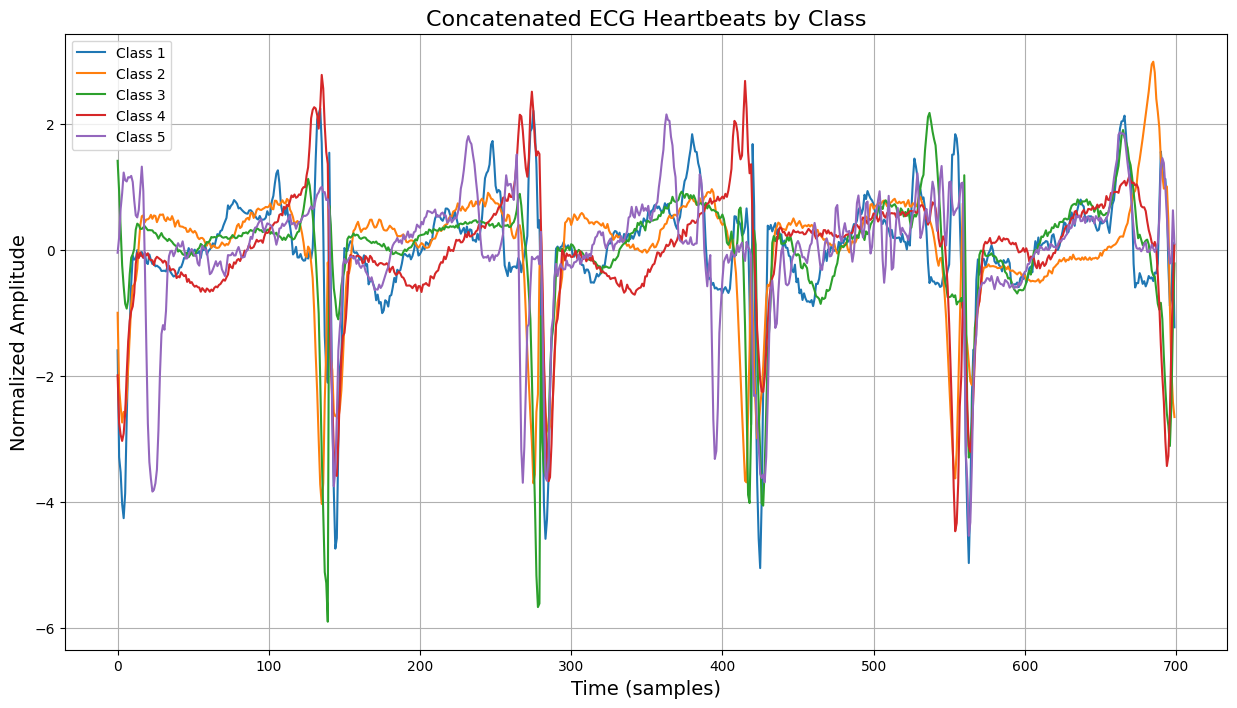

In [10]:
plot_concatenated_heartbeats(ecg_df)

- After concatenation the signals seem to have a periodic peaks , it is probably the downward peak in the beginning.

### **Concatenated Normalized ECG Heartbeats**

In [60]:
def plot_fully_concatenated_normalized(df, samples_per_class=5):
    plt.figure(figsize=(15, 6))

    all_signals = []
    class_positions = []
    current_position = 0

    for cls in classes:
        class_data = df[df.iloc[:, -1] == cls].iloc[:, :-1]
        samples = class_data.sample(
            min(samples_per_class, len(class_data)), random_state=42)

        # Store class transition points
        class_positions.append((cls, current_position))

        for signal in samples.values:
            # Normalize each heartbeat
            _, amp_norm = normalize_heartbeat(signal)
            all_signals.extend(amp_norm)
            current_position += len(amp_norm)

    # Plot concatenated signal
    plt.plot(all_signals, alpha=0.7)

    # Add class separation markers
    for cls, pos in class_positions[1:]:
        plt.axvline(x=pos, color='r', linestyle='--', alpha=0.5)
        plt.text(pos, plt.ylim()[1]*0.9, cls,
                 ha='center', va='center', backgroundcolor='w')

    plt.title('Concatenated Normalized ECG Heartbeats', fontsize=16)
    plt.xlabel('Sample Index', fontsize=14)
    plt.ylabel('Normalized Amplitude [-1,1]', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

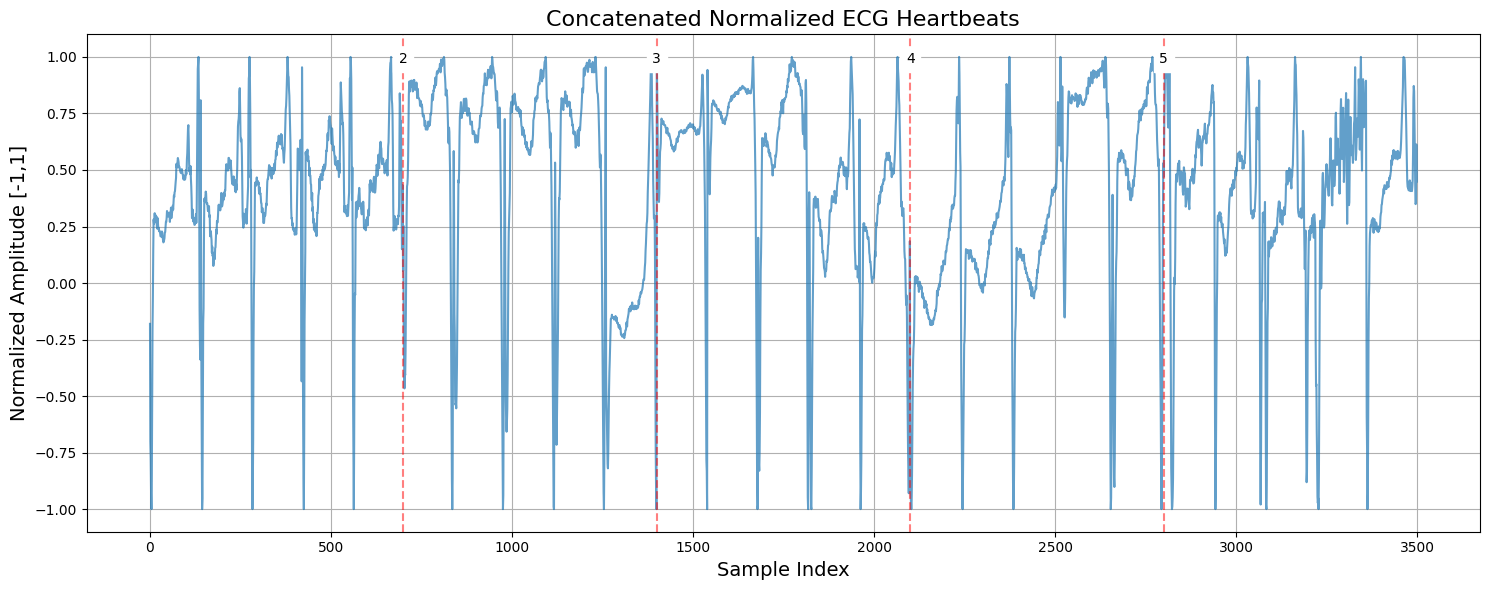

In [61]:
plot_fully_concatenated_normalized(ecg_df)

### **ECG Heartbeat Clusters by Class (Normalized)**

In [41]:
def plot_separate_clusters(df, samples_per_class=5):
    # Create figure with subplots
    fig, axes = plt.subplots(len(classes), 1, figsize=(12, 3*len(classes)))

    # If only one class, make axes array-like for consistency
    if len(classes) == 1:
        axes = [axes]

    for cls_idx, cls in enumerate(classes):
        # Get samples for this class
        class_data = df[df.iloc[:, -1] == cls].iloc[:, :-1]
        samples = class_data.sample(
            min(samples_per_class, len(class_data)), random_state=42)

        # Plot each sample in this class's subplot
        for sample_idx in range(len(samples)):
            signal = samples.iloc[sample_idx, :].values

            # Normalize time and amplitude
            time_norm, amp_norm = normalize_heartbeat(signal)

            # Plot with slight vertical offset for visibility
            axes[cls_idx].plot(time_norm, amp_norm + sample_idx*0.2,
                               alpha=0.7, label=f'Sample {sample_idx+1}')

        # Configure subplot
        axes[cls_idx].set_title(f'Class: {cls}', fontsize=12)
        axes[cls_idx].set_xlim(0, 1)
        axes[cls_idx].set_ylim(-1.5, 1.5)  # Extra space for offsets
        axes[cls_idx].set_ylabel('Norm. Amplitude', fontsize=10)
        axes[cls_idx].grid(True)
        axes[cls_idx].legend()

        # Only show xlabel on bottom plot
        if cls_idx == len(classes)-1:
            axes[cls_idx].set_xlabel('Normalized Time [0,1]', fontsize=10)
        else:
            axes[cls_idx].set_xticklabels([])

    plt.suptitle('ECG Heartbeat Clusters by Class (Normalized)',
                 fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

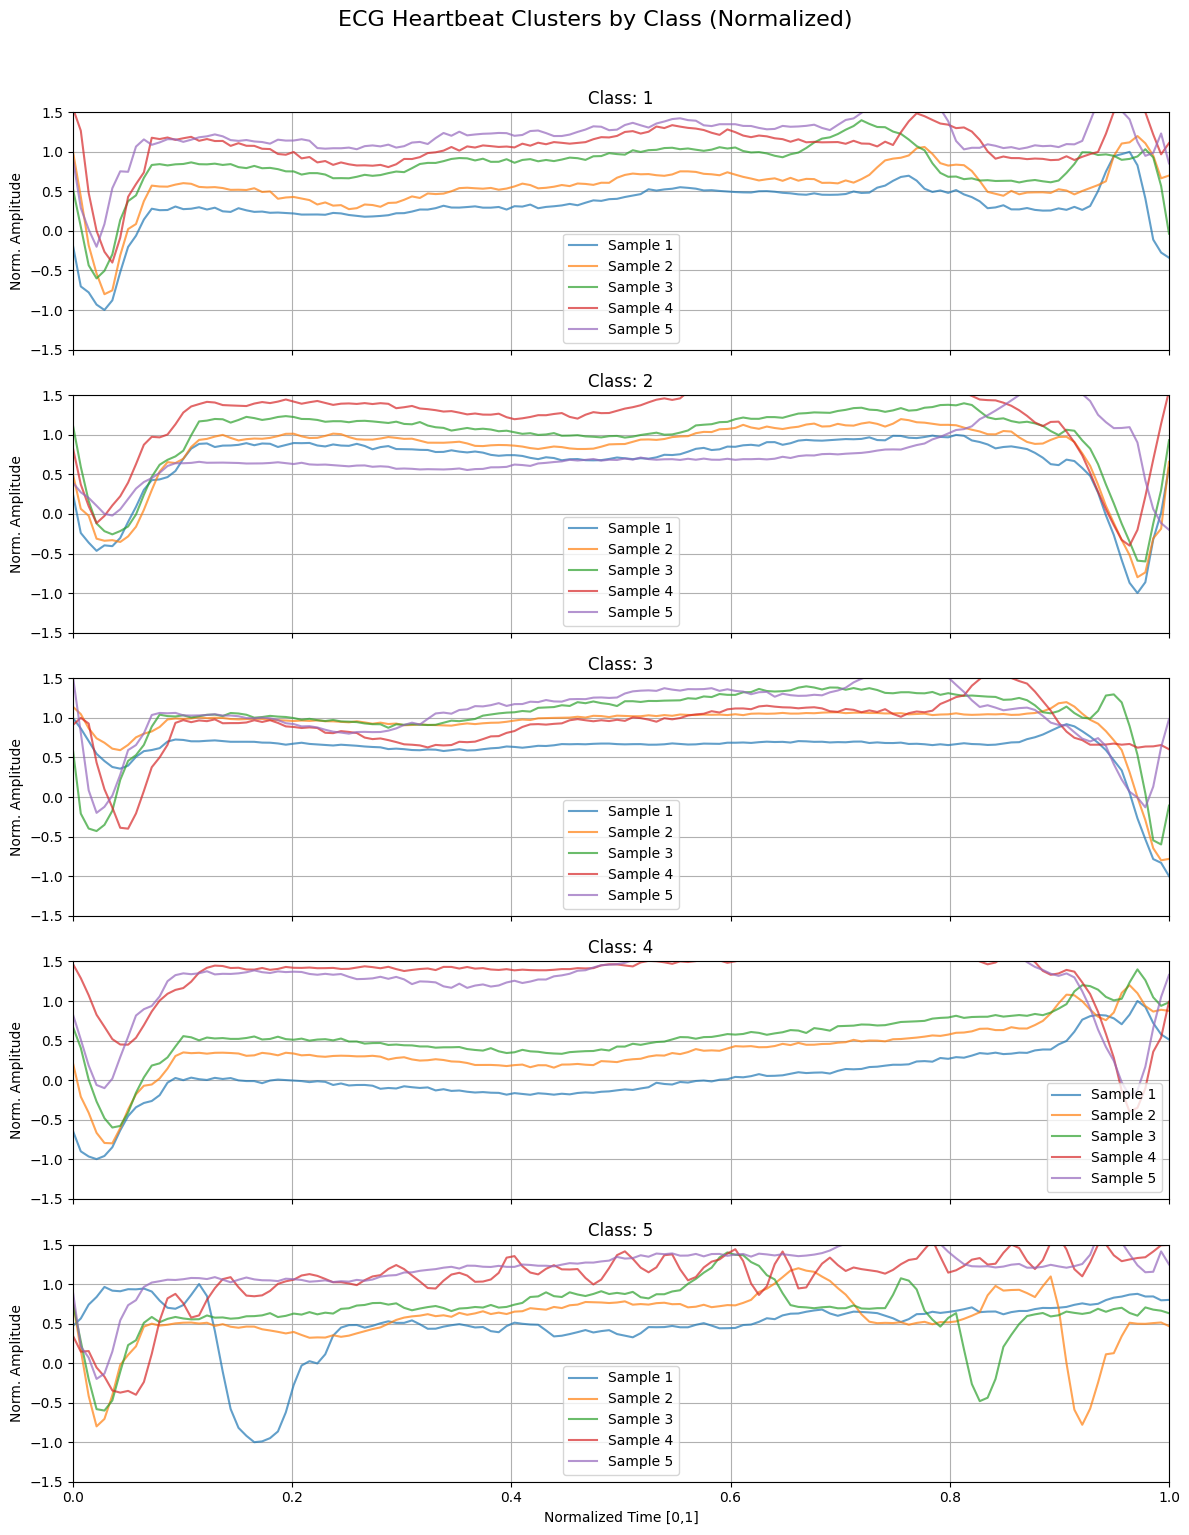

In [42]:
plot_separate_clusters(ecg_df)

### **Plot of different clusters**

In [30]:
def plot_separate_clusters_simplified(df, samples_per_class=50, color=None):
    """
    Plot ECG clusters in separate subplots with simplified styling
    
    Parameters:
    - df: DataFrame containing ECG data
    - samples_per_class: Number of samples to plot per class
    - color: Color to use for all samples (if None, uses default cycle)
    """
    # Create figure with subplots
    fig, axes = plt.subplots(len(classes), 1, figsize=(12, 3*len(classes)))

    # If only one class, make axes array-like for consistency
    if len(classes) == 1:
        axes = [axes]

    for cls_idx, cls in enumerate(classes):
        # Get samples for this class
        class_data = df[df.iloc[:, -1] == cls].iloc[:, :-1]
        samples = class_data.sample(
            min(samples_per_class, len(class_data)), random_state=42)

        # Plot each sample in this class's subplot
        for sample_idx in range(len(samples)):
            signal = samples.iloc[sample_idx, :].values

            # Normalize time and amplitude
            time_norm, amp_norm = normalize_heartbeat(signal)

            # Plot with consistent color and slight transparency
            axes[cls_idx].plot(time_norm, amp_norm + sample_idx*0.0,  # No vertical offset
                               color=color,
                               alpha=0.3,  # Make lines semi-transparent
                               linewidth=0.8)

        # Configure subplot
        axes[cls_idx].set_title(
            f'Class: {cls} (n={len(samples)})', fontsize=12)
        axes[cls_idx].set_xlim(0, 1)
        axes[cls_idx].set_ylim(-1.1, 1.1)  # Tight bounds since no offset
        axes[cls_idx].set_ylabel('Amplitude', fontsize=10)
        axes[cls_idx].grid(True, alpha=0.3)

        # Only show xlabel on bottom plot
        if cls_idx == len(classes)-1:
            axes[cls_idx].set_xlabel('Normalized Time [0,1]', fontsize=10)
        else:
            axes[cls_idx].set_xticklabels([])

    plt.suptitle('ECG Heartbeat Clusters by Class', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

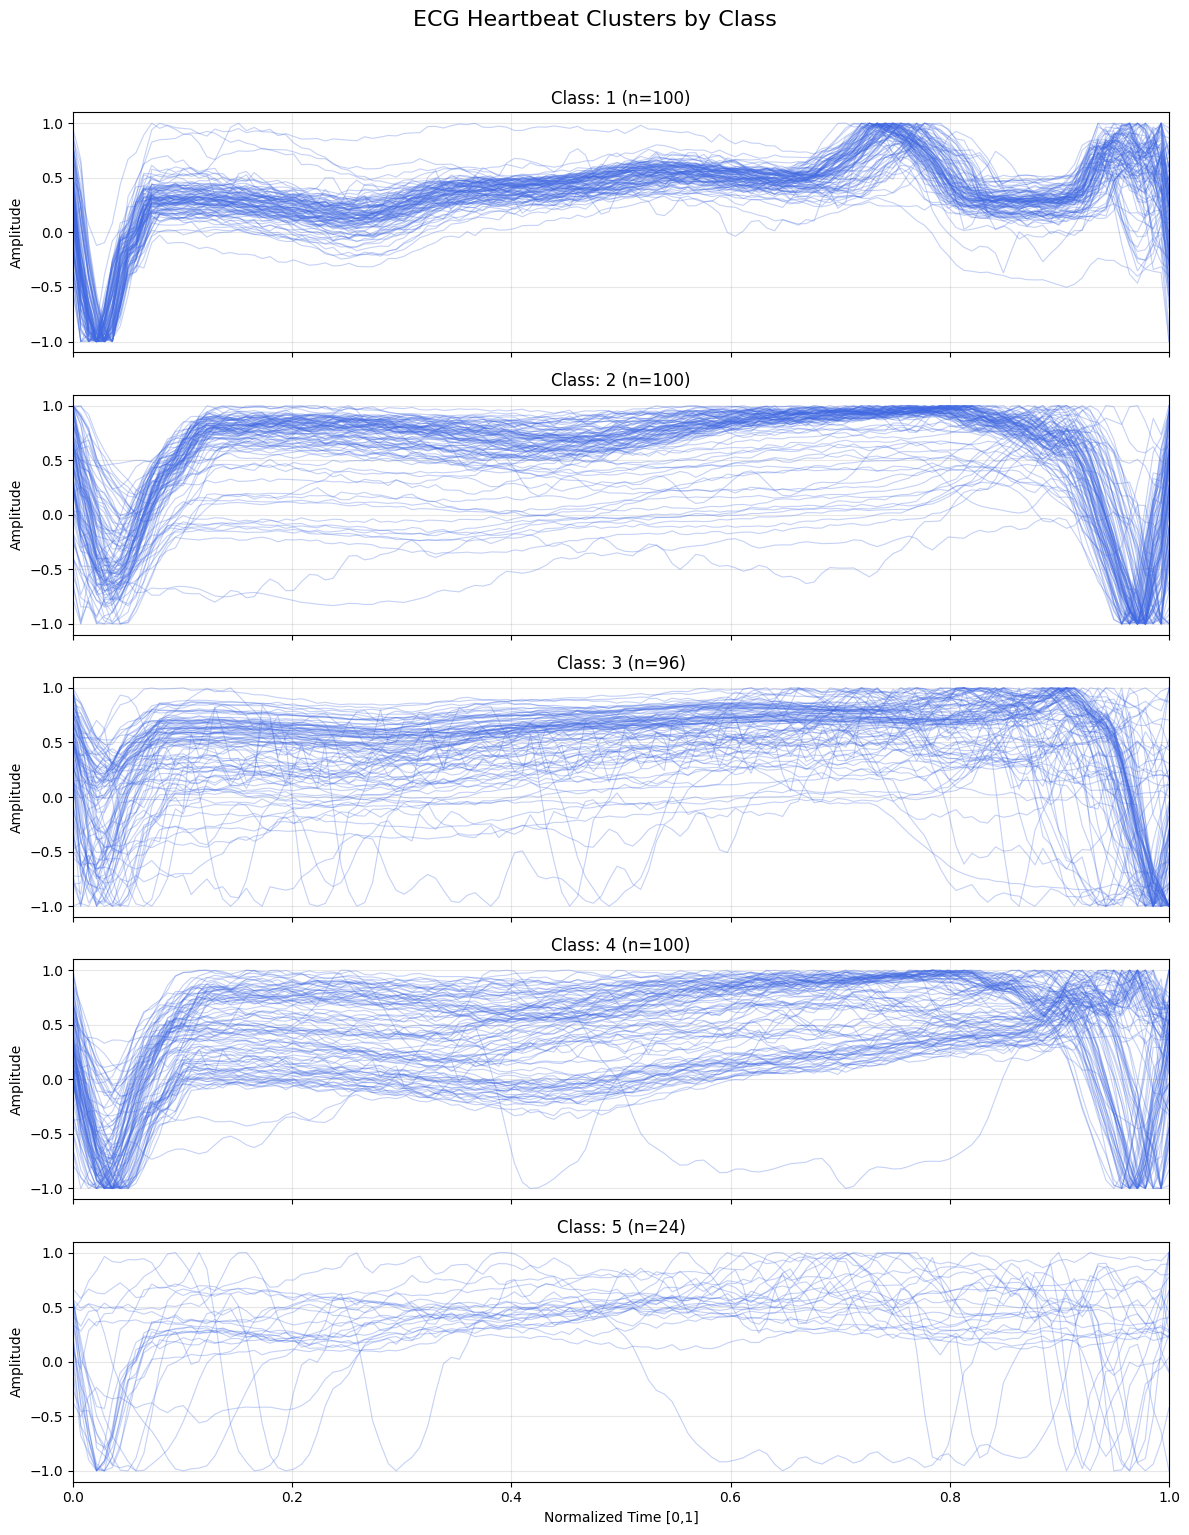

In [32]:
plot_separate_clusters_simplified(
    ecg_df, samples_per_class=100, color='royalblue')

- It is now evident that class 1 signals are tightly clustered , and appear to take the same shape as the individuel signals .

- In the same way class 2 signals are clustered , there are some outline signals , but mainly they are close. 

- Class 3,4 signals are loosely clustered.

- This is logical as the number of samlples isn't  equal through out the classes.

### **Normalized ECG Heartbeat Clusters by Class**

In [45]:
def plot_normalized_clusters(df, samples_per_class=3, spacing=1.0):
    plt.figure(figsize=(15, 8))

    for cls_idx, cls in enumerate(classes):
        # Get samples for this class
        class_data = df[df.iloc[:, -1] == cls].iloc[:, :-1]
        samples = class_data.sample(
            min(samples_per_class, len(class_data)), random_state=42)

        # Process each sample
        for sample_idx in range(len(samples)):
            signal = samples.iloc[sample_idx, :].values

            # Normalize time and amplitude
            time_norm, amp_norm = normalize_heartbeat(signal)

            # Offset each sample for visualization
            x_offset = cls_idx * (1 + spacing)  # Class separation
            y_offset = sample_idx * 2.5  # Sample separation within class

            # Plot with adjusted coordinates
            plt.plot(time_norm + x_offset, amp_norm + y_offset,
                     label=f'Class {cls}' if sample_idx == 0 else "")

            # Add class label
            if sample_idx == 0:
                plt.text(x_offset + 0.5, y_offset - 1.5, cls,
                         ha='center', va='center', fontsize=12)

    plt.title('Normalized ECG Heartbeat Clusters by Class', fontsize=16)
    plt.xlabel('Normalized Time (per cluster)', fontsize=14)
    plt.ylabel('Normalized Amplitude (per sample)', fontsize=14)
    plt.legend()
    plt.grid(True)

    # Set x-axis to show class separation
    plt.xticks(np.arange(len(classes)) * (1 + spacing) + 0.5,
               classes, rotation=45)

    plt.tight_layout()
    plt.show()

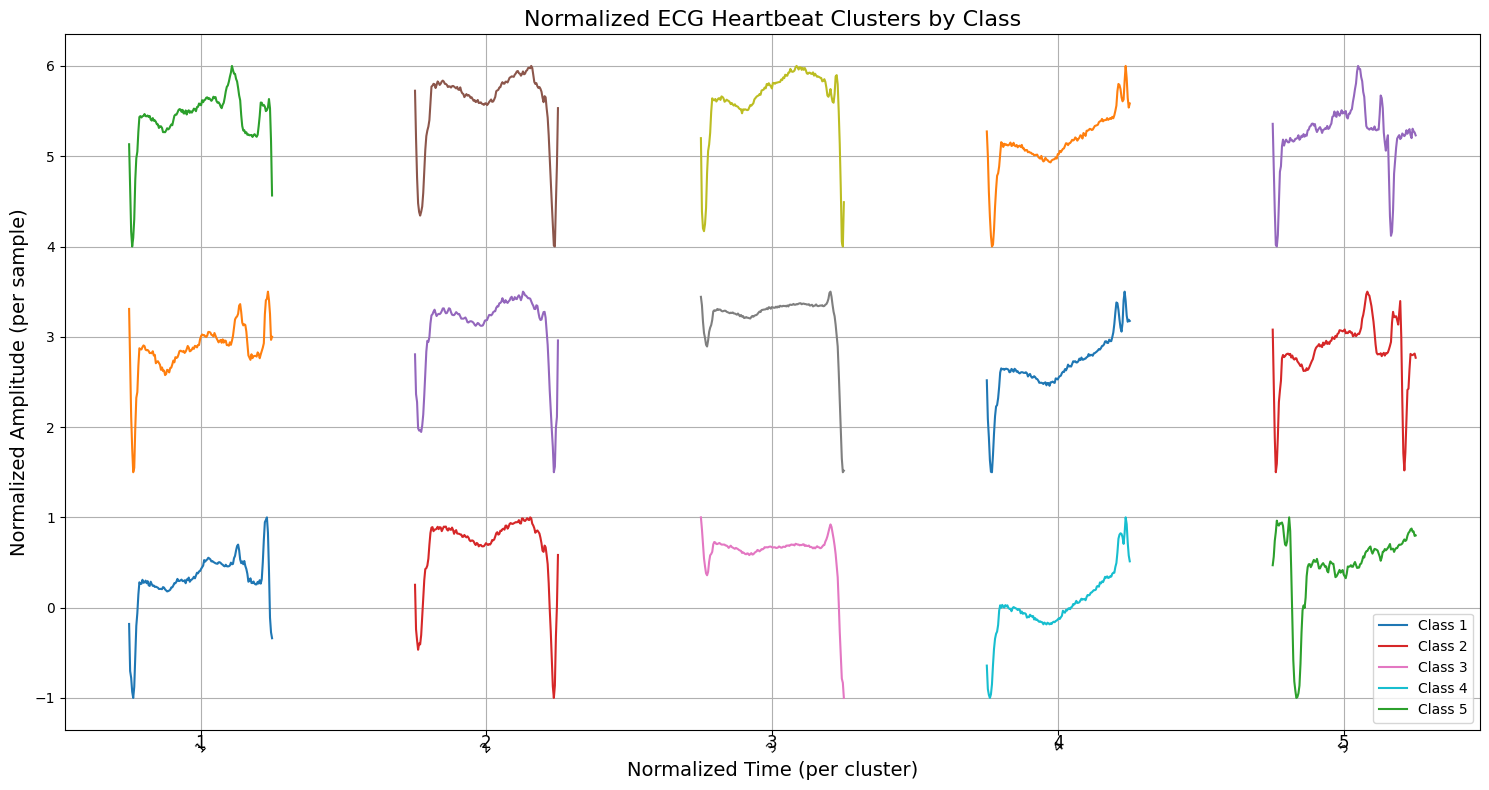

In [46]:


# Plot normalized clusters
plot_normalized_clusters(ecg_df)

### **2D PCA Projection of Normalized ECG Clusters**

In [57]:
def plot_cluster_pca(df, samples_per_class=20):
    # Prepare data
    X = []
    y = []

    for cls in classes:
        class_data = df[df.iloc[:, -1] == cls].iloc[:, :-1]
        samples = class_data.sample(
            min(samples_per_class, len(class_data)), random_state=42)

        for signal in samples.values:
            # Normalize each heartbeat
            _, amp_norm = normalize_heartbeat(signal)
            X.append(amp_norm)
            y.append(cls)

    # Standardize and apply PCA
    X_std = StandardScaler().fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_std)

    # Plot
    plt.figure(figsize=(10, 8))
    for cls in classes:
        idx = [i for i, label in enumerate(y) if label == cls]
        plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=cls, alpha=0.7)

    plt.title('2D PCA Projection of Normalized ECG Clusters', fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


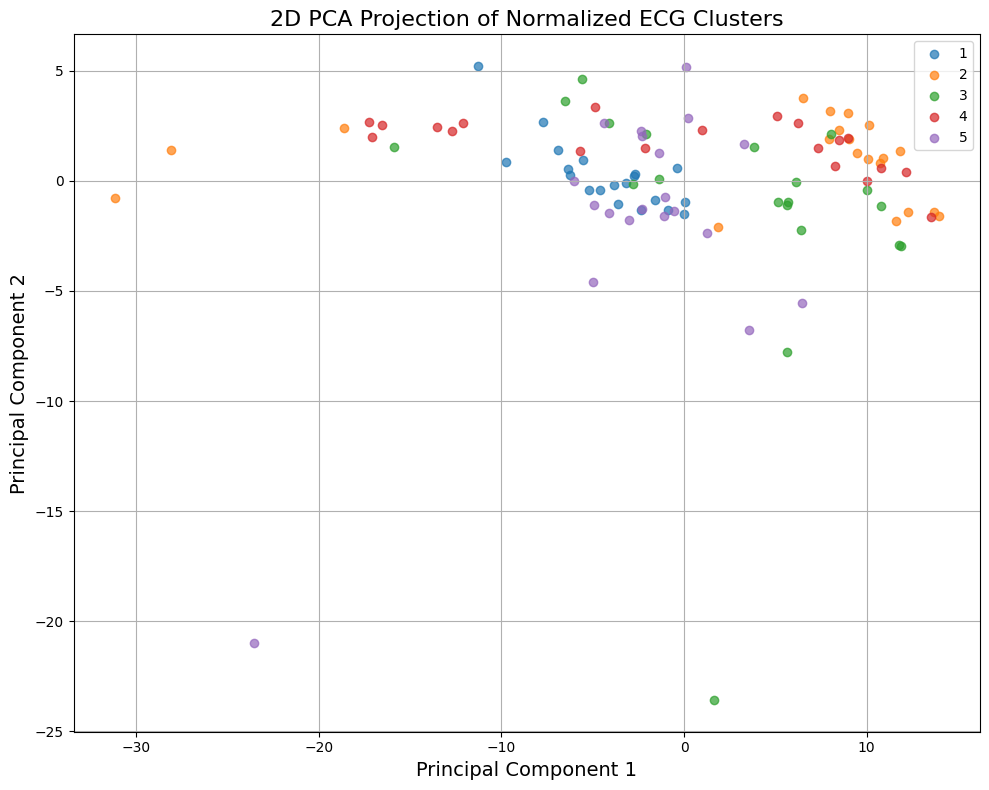

In [58]:
plot_cluster_pca(ecg_df)

## *4. Frequency Domain-Analysis*

### **Perform FFT analysis on representative signals from each ECG class**

In [33]:
def fft_analysis(df, classes, fs=500):
    """
    Perform FFT analysis on representative signals from each ECG class
    
    Parameters:
    - df: DataFrame containing ECG data
    - classes: List of class labels
    - fs: Sampling frequency (Hz)
    """
    # Create figure with subplots
    fig, axs = plt.subplots(len(classes), 2, figsize=(15, 3*len(classes)))

    # If only one class, make axes array-like for consistency
    if len(classes) == 1:
        axs = [axs]

    for cls_idx, cls in enumerate(classes):
        # Get first sample from this class
        class_data = df[df.iloc[:, -1] == cls].iloc[:, :-1]
        signal = class_data.iloc[0, :].values

        # Normalize signal
        signal = (signal - np.mean(signal)) / np.std(signal)

        # Time domain parameters
        n = len(signal)
        t = np.arange(n) / fs

        # Frequency domain analysis
        yf = fft(signal)
        xf = fftfreq(n, 1/fs)[:n//2]
        yf_abs = 2.0/n * np.abs(yf[:n//2])

        # Find dominant frequencies (peaks in spectrum)
        peaks, _ = find_peaks(yf_abs, height=0.1*np.max(yf_abs), distance=5)
        dominant_freqs = xf[peaks]
        dominant_mags = yf_abs[peaks]

        # Plot time domain
        axs[cls_idx, 0].plot(t, signal)
        axs[cls_idx, 0].set_title(f'Time Domain - Class {cls}', fontsize=12)
        axs[cls_idx, 0].set_xlabel('Time (s)', fontsize=10)
        axs[cls_idx, 0].set_ylabel('Amplitude', fontsize=10)
        axs[cls_idx, 0].grid(True)

        # Plot frequency domain
        axs[cls_idx, 1].plot(xf, yf_abs)
        axs[cls_idx, 1].plot(dominant_freqs, dominant_mags, "xr")  # Mark peaks
        axs[cls_idx, 1].set_title(
            f'Frequency Domain - Class {cls}', fontsize=12)
        axs[cls_idx, 1].set_xlabel('Frequency (Hz)', fontsize=10)
        axs[cls_idx, 1].set_ylabel('Magnitude', fontsize=10)
        axs[cls_idx, 1].grid(True)

        # Annotate dominant frequencies
        for freq, mag in zip(dominant_freqs, dominant_mags):
            axs[cls_idx, 1].annotate(f'{freq:.1f} Hz',
                                     xy=(freq, mag),
                                     xytext=(5, 5),
                                     textcoords='offset points',
                                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

        # Set x-axis limits to show relevant frequencies (0-50Hz for ECG)
        axs[cls_idx, 1].set_xlim(0, 250)

    plt.suptitle(
        'Time and Frequency Domain Analysis of ECG Signals', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

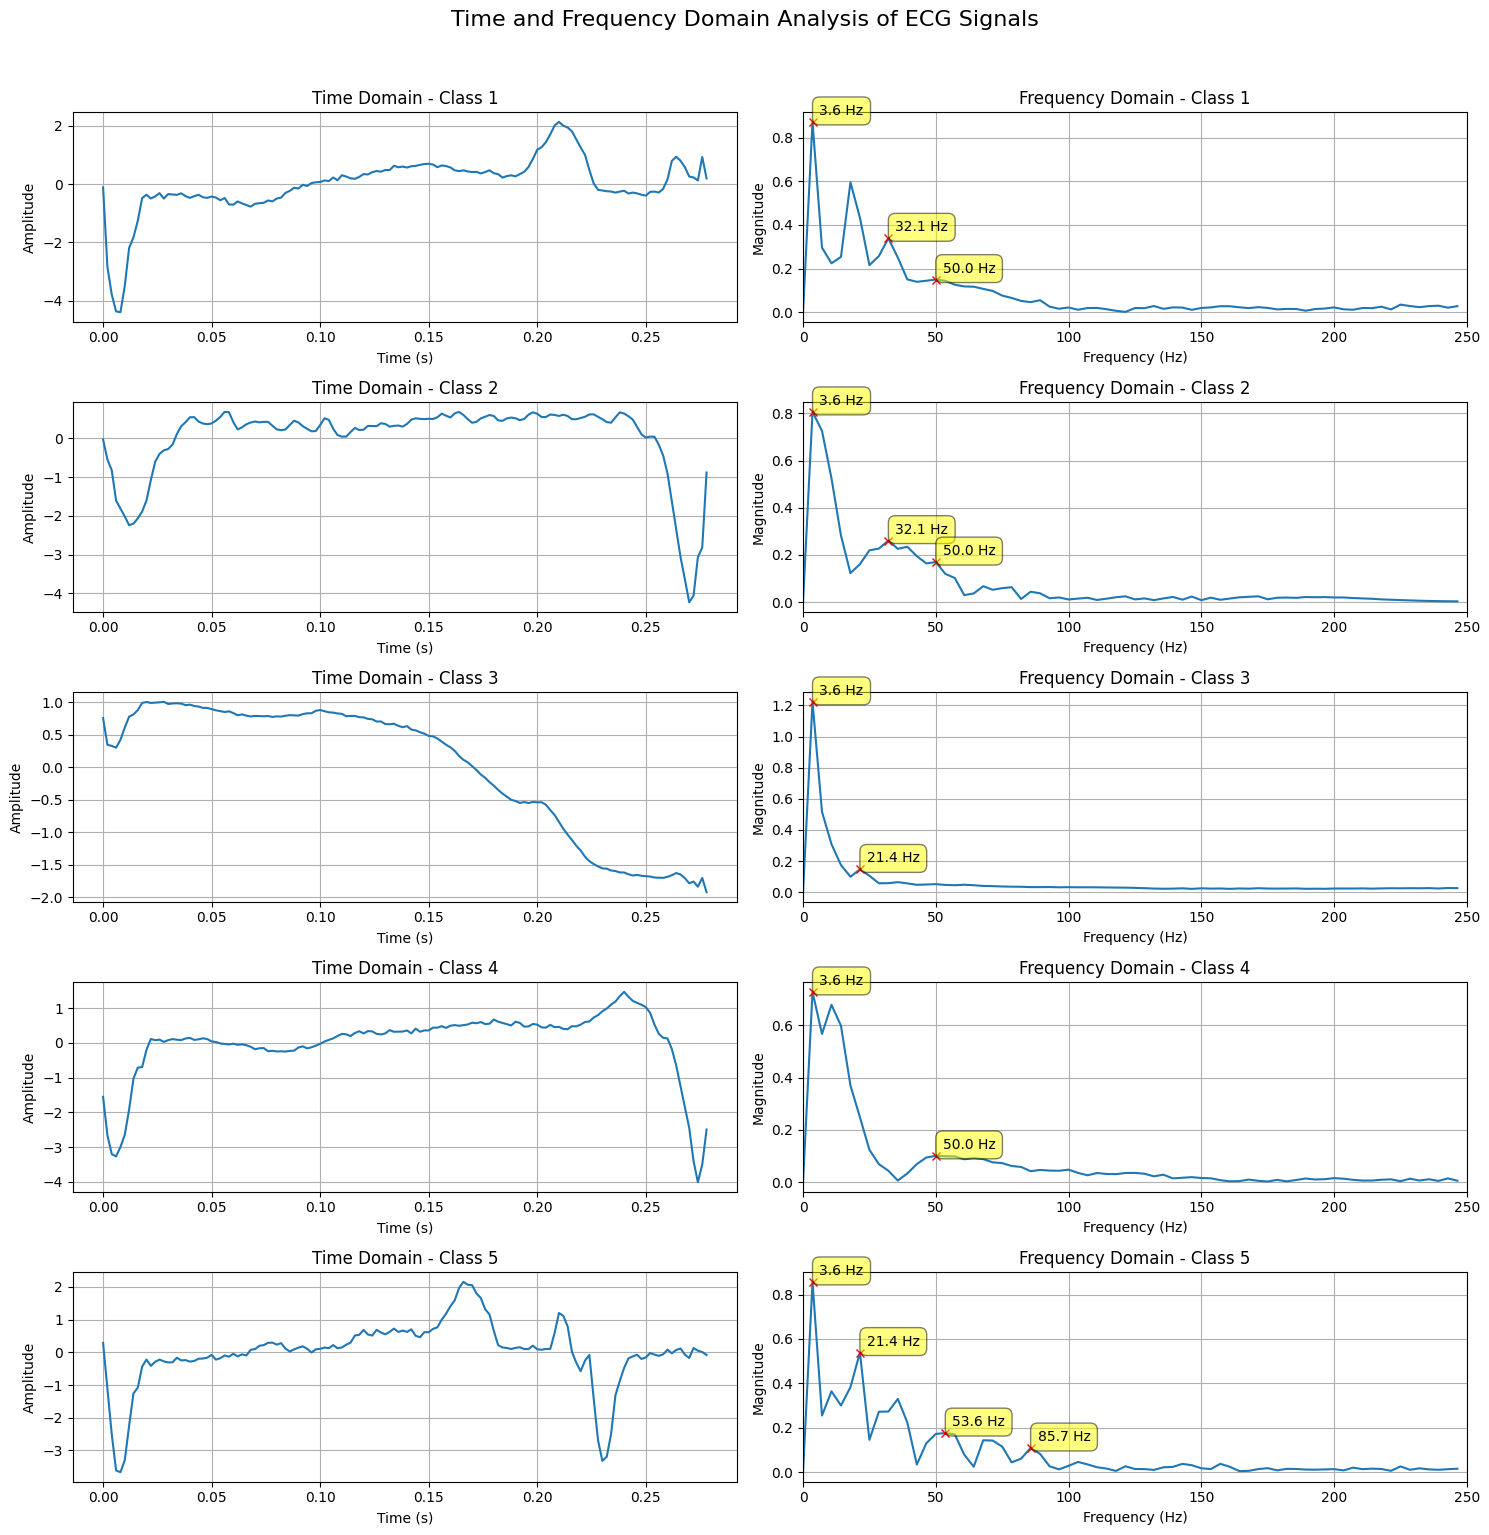

In [34]:
# Perform analysis
fft_analysis(ecg_df, classes)

- Class 5 appear to have many frequencies embedded within it (3.6 , 21.4 , 53.6 , 87.7)Hz 

- Class 4,2,1 appear to have the same frequencies mainly (3.6 , 50)Hz 

- All the classes have in common the frequency 3.6Hz with high magnitude, it can be interpreted that it is the one responsable for the downward spike that appears in the first part of the signals.

### **Compare frequency content across classes**

In [ ]:
def compare_frequency_content(df, classes, fs=500, max_freq=50):
    plt.figure(figsize=(12, 6))

    for cls in classes:
        # Get first sample from this class
        class_data = df[df.iloc[:, -1] == cls].iloc[:, :-1]
        signal = class_data.iloc[0, :].values

        # Normalize
        signal = (signal - np.mean(signal)) / np.std(signal)

        # Compute FFT
        n = len(signal)
        yf = fft(signal)
        xf = fftfreq(n, 1/fs)[:n//2]
        yf_abs = 2.0/n * np.abs(yf[:n//2])

        # Plot frequency content
        plt.plot(xf, yf_abs, label=f'Class {cls}')

    plt.title('Frequency Spectrum Comparison Across Classes', fontsize=16)
    plt.xlabel('Frequency (Hz)', fontsize=14)
    plt.ylabel('Magnitude', fontsize=14)
    plt.xlim(0, max_freq)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

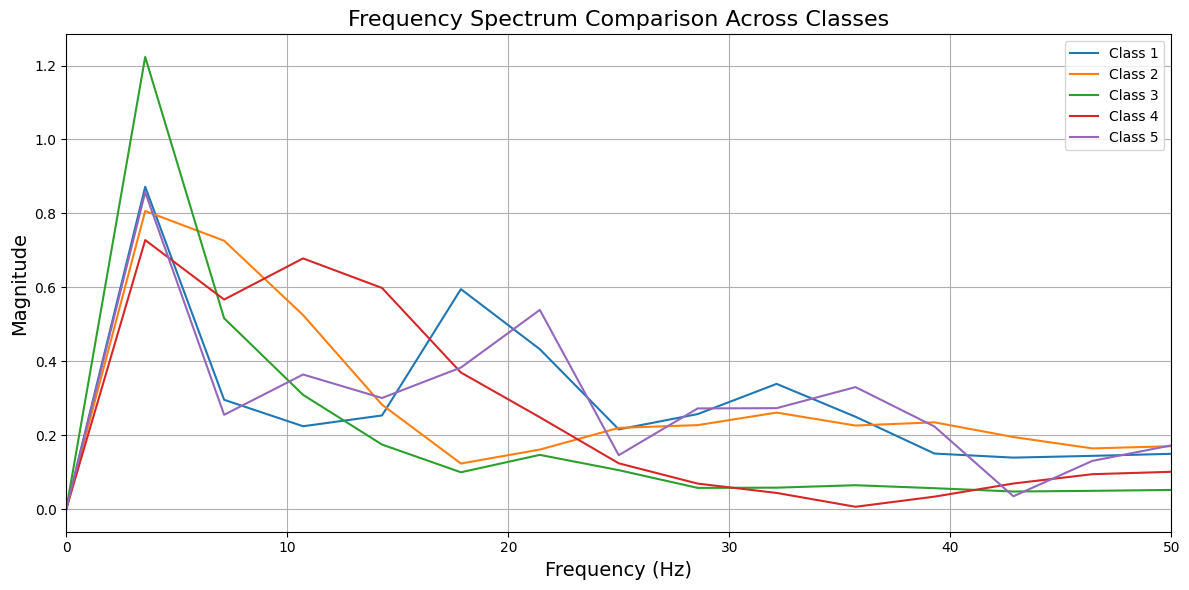

In [15]:
compare_frequency_content(ecg_df, classes)

### **Perform FFT analysis on ALL signals within each class and visualize aggregate results**

- In order to take a deep look on all the signals frequency and not individually:

In [35]:
def class_wide_fft_analysis(df, classes, fs=500, max_freq=50):
    """
    Perform FFT analysis on ALL signals within each class and visualize aggregate results
    
    Parameters:
    - df: DataFrame containing ECG data
    - classes: List of class labels
    - fs: Sampling frequency (Hz)
    - max_freq: Maximum frequency to display (Hz)
    """
    plt.figure(figsize=(15, 5*len(classes)))

    for cls_idx, cls in enumerate(classes):
        # Get all samples from this class
        class_data = df[df.iloc[:, -1] == cls].iloc[:, :-1]
        num_samples = len(class_data)

        # Initialize arrays for aggregate results
        all_psds = []
        freqs = None

        # Process each signal in the class
        for i in tqdm(range(num_samples), desc=f'Processing {cls}'):
            signal = class_data.iloc[i, :].values

            # Normalize
            signal = (signal - np.mean(signal)) / np.std(signal)

            # Compute Power Spectral Density (PSD) using Welch's method
            f, Pxx = welch(signal, fs, nperseg=min(256, len(signal)))
            all_psds.append(Pxx)
            freqs = f  # All will have same freq bins

        # Convert to array and compute statistics
        all_psds = np.array(all_psds)
        mean_psd = np.mean(all_psds, axis=0)
        std_psd = np.std(all_psds, axis=0)

        # Create subplot for this class
        plt.subplot(len(classes), 1, cls_idx+1)

        # Plot mean PSD with variability band
        plt.semilogy(freqs, mean_psd, label='Mean PSD', color='blue')
        plt.fill_between(freqs,
                         mean_psd - std_psd,
                         mean_psd + std_psd,
                         alpha=0.2, color='blue',
                         label='±1 STD')

        # Find and mark dominant frequency region
        dominant_idx = np.argmax(mean_psd[freqs <= max_freq])
        dominant_freq = freqs[dominant_idx]
        plt.axvline(dominant_freq, color='red', linestyle='--',
                    label=f'Dominant Freq: {dominant_freq:.1f} Hz')

        # Format plot
        plt.title(
            f'Class {cls} (n={num_samples}) - Power Spectral Density', fontsize=12)
        plt.xlabel('Frequency (Hz)', fontsize=10)
        plt.ylabel('Power/Frequency (dB/Hz)', fontsize=10)
        plt.xlim(0, max_freq)
        plt.grid(True, which='both', linestyle='--', alpha=0.5)
        plt.legend()

    plt.suptitle('Aggregate Frequency Analysis by ECG Class',
                 fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

Processing 5: 100%|██████████| 24/24 [00:00<00:00, 2234.73it/s]


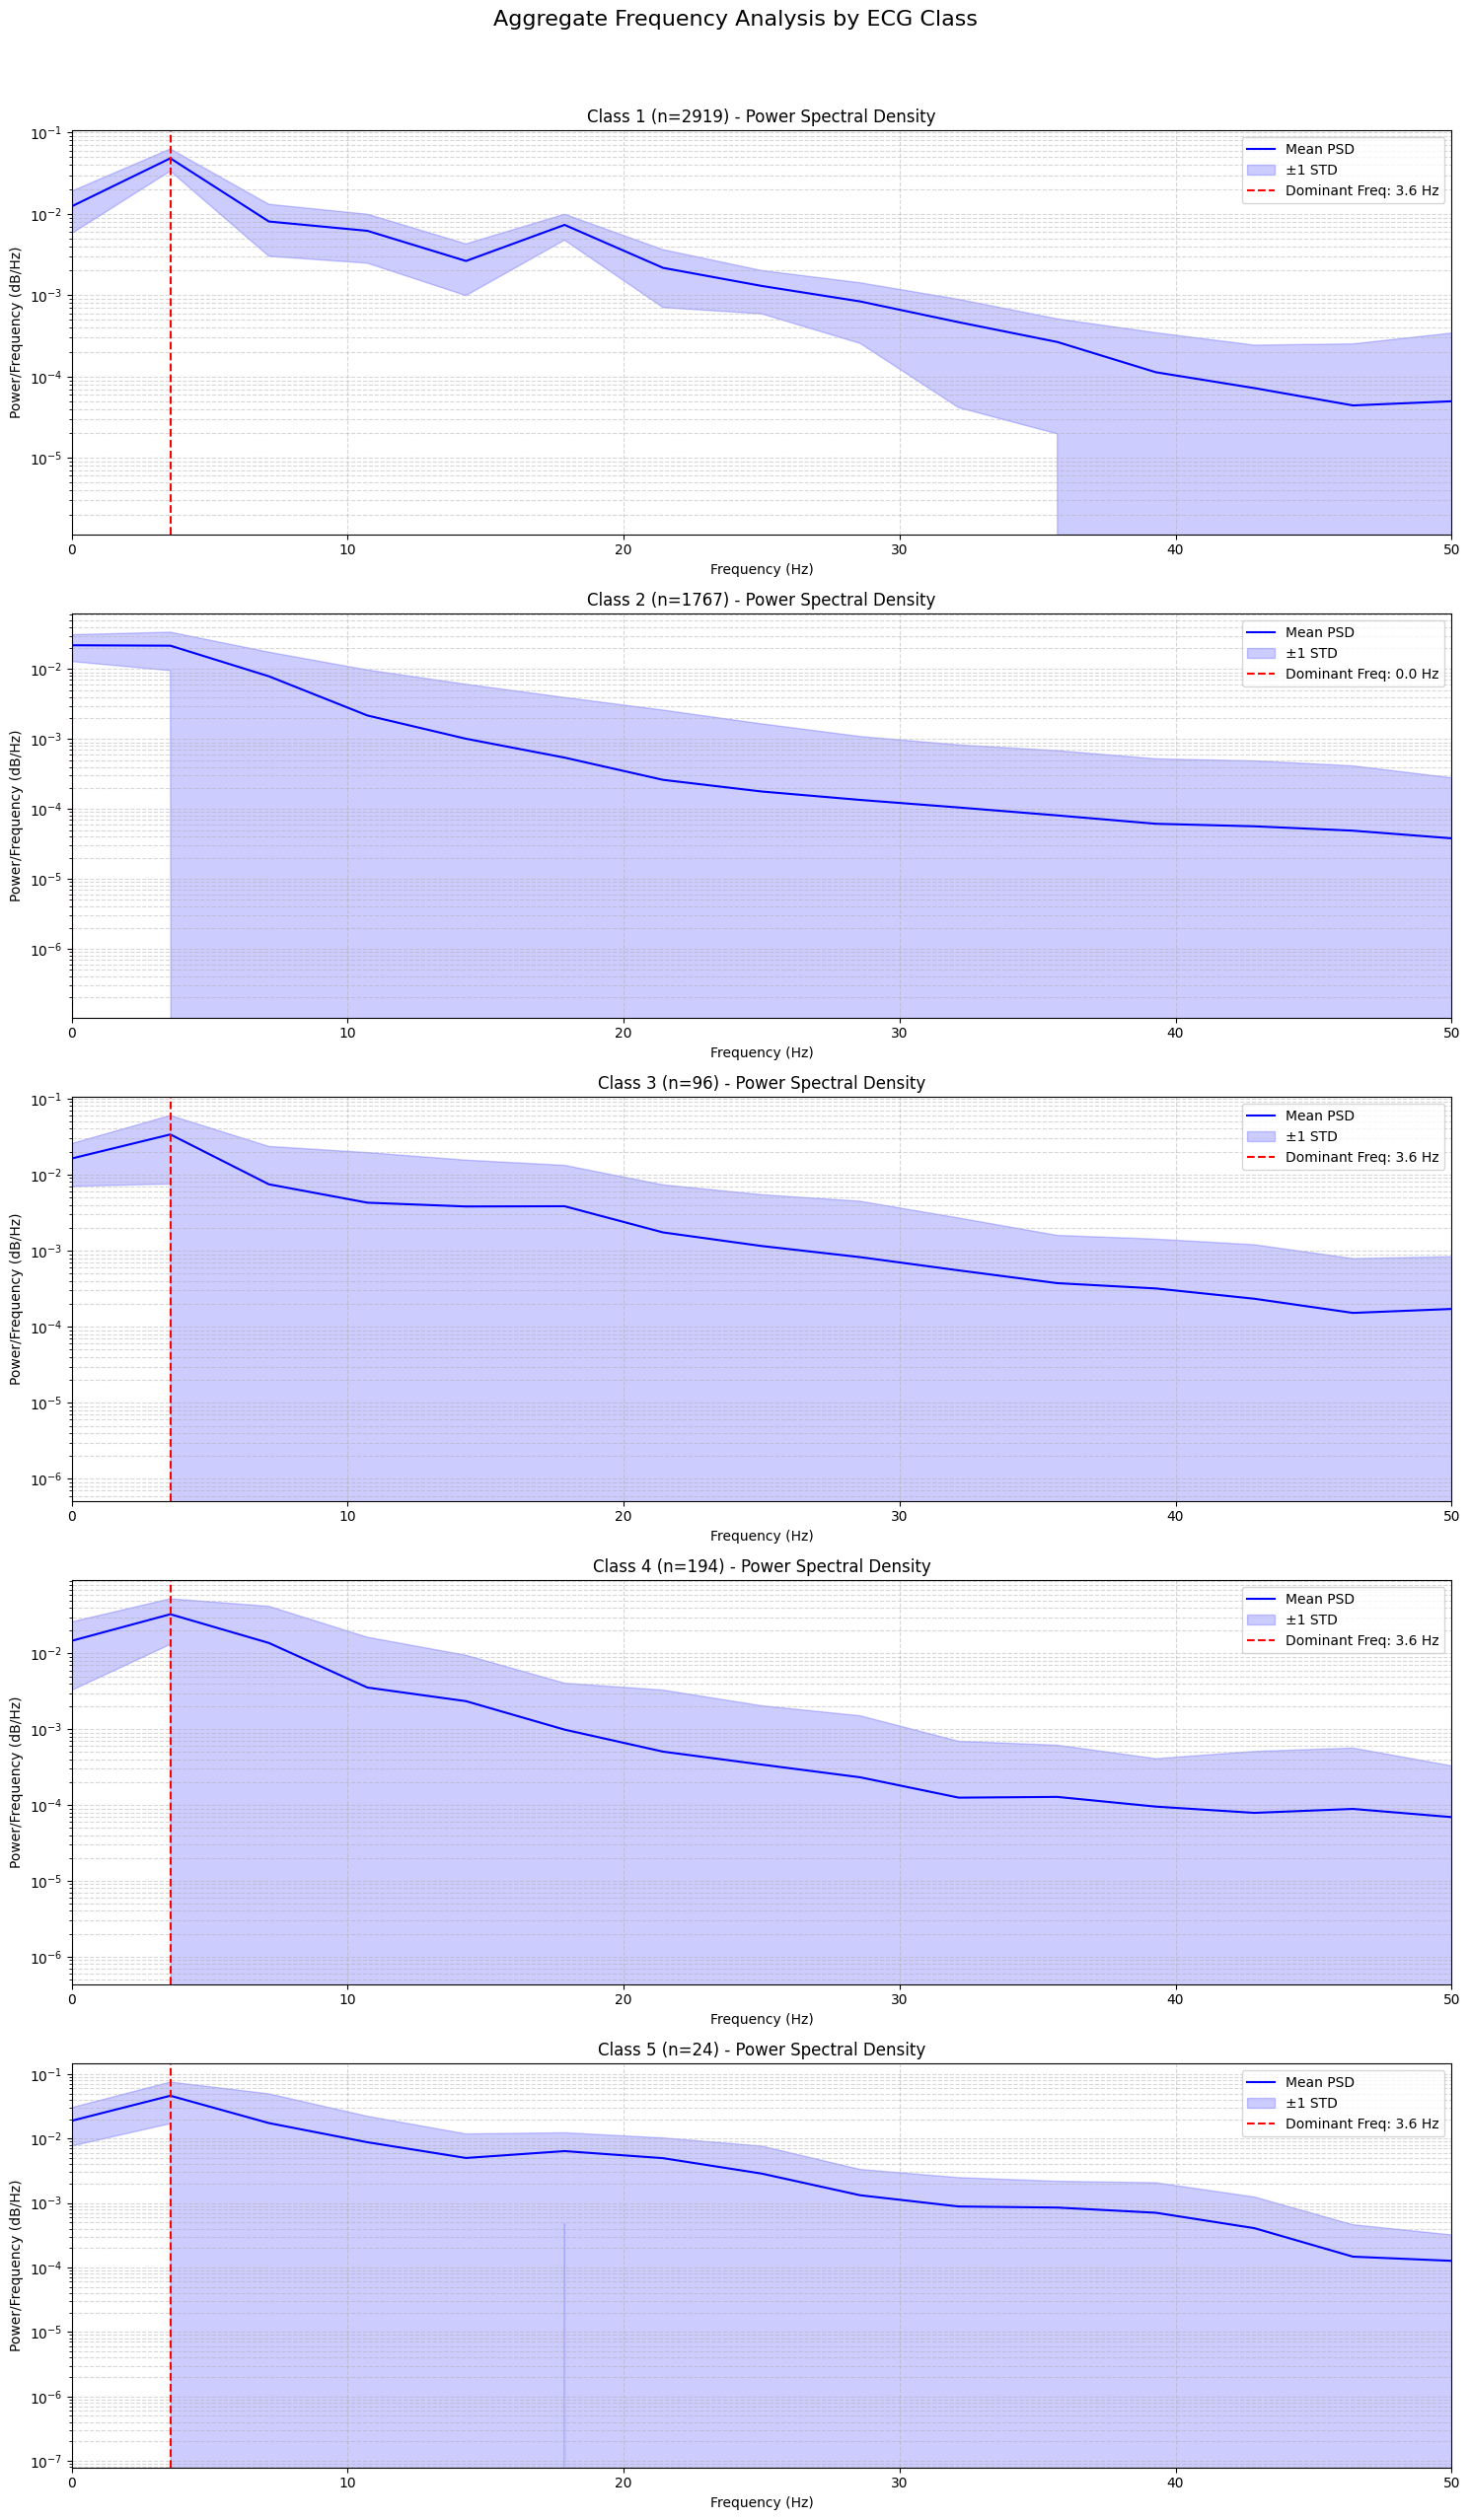

In [36]:
# Perform analysis
class_wide_fft_analysis(ecg_df, classes)

- It is clear that after the frequency that all classes have in common , variance is very high and the gain is highly variant in classes 2,3,4. Except in Class 1 the variance is very low and it has very unique behavior. It is important to note that classes 2,3,4 have very similar frequency domaines.

### **Spectrogram matrix for each class**

In [37]:
def plot_class_spectrograms(df, classes, fs=500):
    fig, axs = plt.subplots(len(classes), 1, figsize=(15, 4*len(classes)))

    if len(classes) == 1:
        axs = [axs]

    for cls_idx, cls in enumerate(classes):
        class_data = df[df.iloc[:, -1] == cls].iloc[:, :-1]
        signal = class_data.iloc[0, :].values  # Representative sample

        # Compute spectrogram
        f, t, Sxx = spectrogram(signal, fs, nperseg=64, noverlap=32)

        # Plot
        im = axs[cls_idx].pcolormesh(t, f, 10 * np.log10(Sxx),
                                     shading='gouraud', cmap='viridis')
        fig.colorbar(im, ax=axs[cls_idx], label='Intensity (dB)')
        axs[cls_idx].set_title(
            f'Class {cls} - Time-Frequency Representation', fontsize=12)
        axs[cls_idx].set_ylabel('Frequency (Hz)', fontsize=10)
        axs[cls_idx].set_xlabel('Time (s)', fontsize=10)
        axs[cls_idx].set_ylim(0, 50)

    plt.suptitle('ECG Spectrograms by Class', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


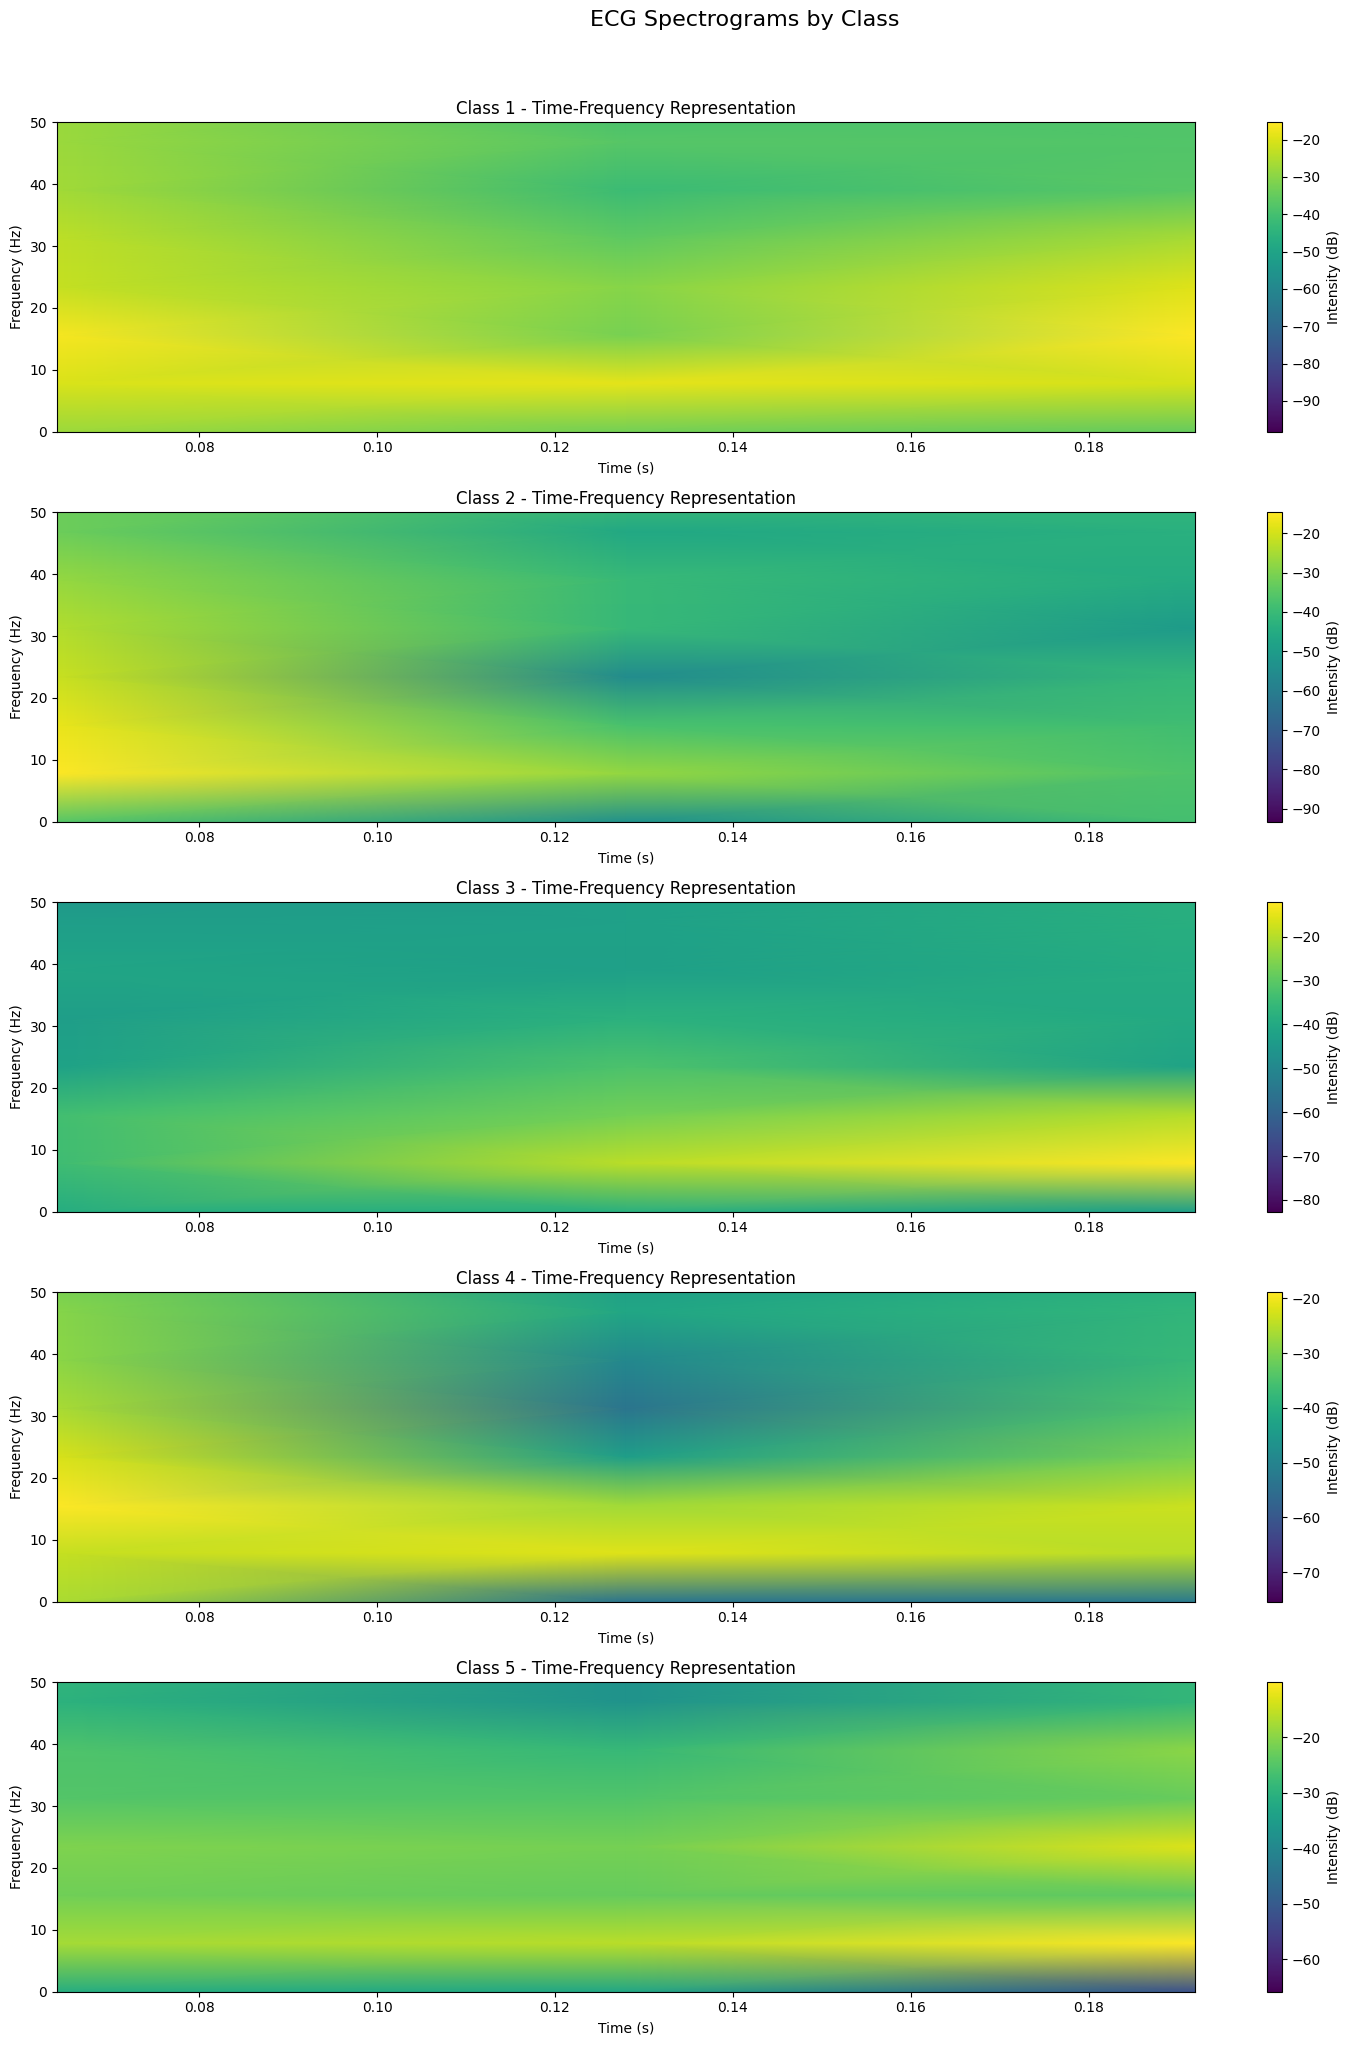

In [38]:
plot_class_spectrograms(ecg_df, classes)